In [270]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as sts

In [271]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [272]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [273]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [274]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [275]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [276]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [277]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [278]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [279]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores 
#(used stackoverflow to help convert tuple to list)

last_year = session.query(Measurement.date).filter(Measurement.date >= "2016-08-23").all()
list_year = [i[0] for i in last_year]
# print(list_year)

last_precip = session.query(Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()
list_precip = [i[0] for i in last_precip]
# print(list_precip)

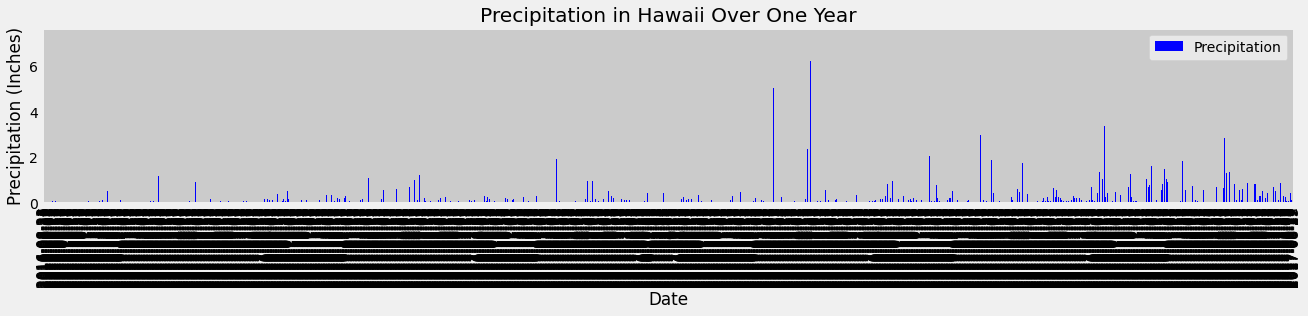

In [280]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame({"Date": list_year, "Precipitation": list_precip})
year_prcp_df = year_prcp_df.dropna(how="any") #I personally chose to drop rows without data
year_prcp_df.set_index("Date", inplace=True)

# Sort the dataframe by date
year_prcp_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
year_prcp_df.plot(kind="bar", color="blue", figsize=(20,3), rot=90)
plt.ylim(0, max(year_prcp_df["Precipitation"])+1)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title("Precipitation in Hawaii Over One Year")
plt.savefig("Images/precipitation.png")
plt.show()

In [281]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip = year_prcp_df["Precipitation"]

mean_numpy = np.mean(precip)
print(f"The mean for precipitation in inches is {mean_numpy}.")

median_numpy = np.median(precip)
print(f"The median for precipitation in inches is {median_numpy}.")

mode_scipy = sts.mode(precip)
print(f"The mode for precipitation in inches is {mode_scipy}.")

The mean for precipitation in inches is 0.17727857496288996.
The median for precipitation in inches is 0.02.
The mode for precipitation in inches is ModeResult(mode=array([0.]), count=array([874])).


# Exploratory Station Analysis

In [282]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [283]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [284]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print(f"max temp: {max_temp}")

min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print(f"min temp: {min_temp}")

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print(f"avg temp: {avg_temp}")

max temp: [(85.0,)]
min temp: [(54.0,)]
avg temp: [(71.66378066378067,)]


In [285]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_date = session.query(func.max(Measurement.date)).filter(Measurement.station == "USC00519281").all()
# print(max_station_date)

station_year = session.query(Measurement.date).\
filter(Measurement.date >= "2016-08-18").\
filter(Measurement.station == "USC00519281").all()
list_station_year = [i[0] for i in station_year]
# print(list_station_year)

station_temp = session.query(Measurement.tobs).\
filter(Measurement.date >= "2016-08-18").\
filter(Measurement.station == "USC00519281").all()
list_station_temp = [i[0] for i in station_temp]
# print(list_station_temp)

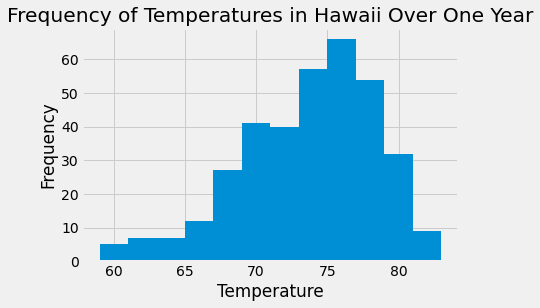

In [286]:
# Create bins and plot histogram
plt.hist(list_station_temp, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Frequency of Temperatures in Hawaii Over One Year")
plt.savefig("Images/temperaturehist.png")
plt.show()

# Close session

In [287]:
# Close Session
session.close()

In [289]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of precipitation data including the date"""
    # Create our session (link) from Python to the DB
    session = Session(engine)

    # Query all passengers
    precip_results = session.query(Measurement.date, Measurement.prcp).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_precip = []
    for date, prcp in precip_results:
        prcp_dict = {}
        prcp_dict["date"] = date
        prcp_dict["prcp"] = prcp
        all_precip.append(prcp_dict)

    return jsonify(all_precip)

print(all_precip)

NameError: name 'all_precip' is not defined